In [273]:
#pip install tensorflow==2.8.0
#pip install keras==2.8.0
#pip install pillow
#pip install opencv python
#pip install scikit-Learn

In [274]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [275]:
df = pd.read_csv("/content/drive/MyDrive/my projects/google land mark/train.csv")
base_path="/content/drive/MyDrive/my projects/google land mark/images"

In [276]:
df

,id,landmark_id
0,0040af7f85f98433,2.0
1,0040b749f1cddb63,2.0
2,0040bef6c41c176e,2.0
3,0040c5ee51867c3f,3.0
4,0040c65c623e8624,2.0
...,...,...
2597,003ff2ff9839d040,18.0
2598,003ff6e93dd45d47,15.0
2599,003ffc9d7b137dec,10.0
2600,003ffe136428f5c2,16.0


In [170]:
samples = 2000
df = df.loc[df["id"].str.startswith(('003','004','002'),na=False), :]
num_classes = len(df["landmark_id"].unique())
num_date = len(df)

In [171]:
num_classes

20

In [172]:
num_date

2596

In [173]:
data=pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()

,index,landmark_id
0,2.0,216
1,4.0,204
2,5.0,194
3,3.0,193
4,6.0,191


In [174]:
data.tail()

,index,landmark_id
14,8.0,106
15,13.0,104
16,14.0,103
17,11.0,103
18,10.0,94


In [175]:
data.columns=['landmark_id','count']

In [176]:
data['count'].describe()

count     19.000000
mean     136.526316
std       40.430143
min       94.000000
25%      107.000000
50%      121.000000
75%      164.500000
max      216.000000
Name: count, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1.]),
 array([  0.  ,   1.06,   2.12,   3.18,   4.24,   5.3 ,   6.36,   7.42,
          8.48,   9.54,  10.6 ,  11.66,  12.72,  13.78,  14.84,  15.9 ,
         16.96,  18.02,  19.08,  20.14,  21.2 ,  22.26,  23.32,  24.38,
         25.44,  26.5 ,  27.56,  28.62,  29.68,  30.74,  31.8 ,  32.86,
         33.92,  34.98,  36.04,  37.1 ,  38.16,  39.22,  40.28,  41.34,
         42.4 ,  43.46,  44.52,  45.58,  46.64,  47.7 ,  48.76,  49.82,
         50.88,  51.94,  53.  ,  54.06,  55.12,  56.18,  57.24,  58.3 ,
         59.36,  60.42,  61.48,  62.54,  63.6 

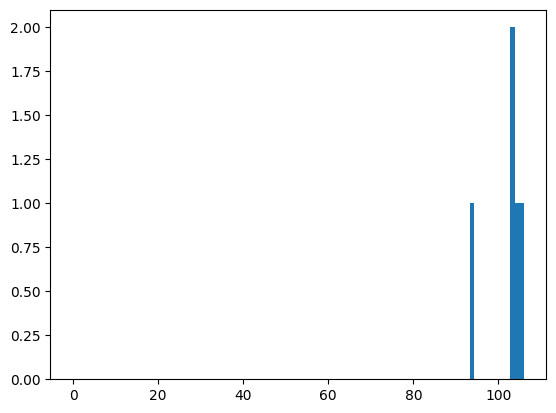

In [177]:
plt.hist(data['count'],100,range =(0,106),label='test')

In [270]:
data['count'].between(0,200).sum()

17

In [271]:
data['count'].between(5,190).sum()

14

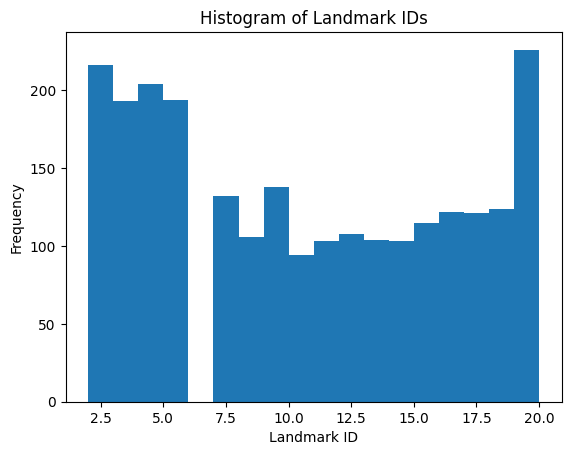

In [180]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
unique_landmark_ids = df["landmark_id"].unique()
bin_edges = sorted(unique_landmark_ids)  # Sort the unique landmark IDs in increasing order

plt.hist(df["landmark_id"], bins=bin_edges)
plt.xlabel("Landmark ID")
plt.ylabel("Frequency")
plt.title("Histogram of Landmark IDs")
plt.show()

In [181]:
from sklearn.preprocessing import LabelEncoder
lencoder =LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [182]:
df.head()

,id,landmark_id
0,0040af7f85f98433,2.0
1,0040b749f1cddb63,2.0
2,0040bef6c41c176e,2.0
3,0040c5ee51867c3f,3.0
4,0040c65c623e8624,2.0


In [268]:
def encode_labels(lbl):
    return lencoder.transform(lbl)

In [269]:
def decode_labels(lbl):
    return lencoder.inverse_transform(lbl)

In [221]:
def get_image_from_number(num, df):
    base_path="/content/drive/MyDrive/my projects/google land mark/images/0/0"
    row = df.iloc[num, :]
    fname = row['id']  # Replace 'id' with the actual column name for the filename
    label = row['landmark_id']
    if not fname.endswith('.jpg'):
        fname += '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    full_path = os.path.join(base_path, f1, f2, f3, fname)
    im = cv2.imread(full_path)
    return im, label


4 sample imag fron random classes


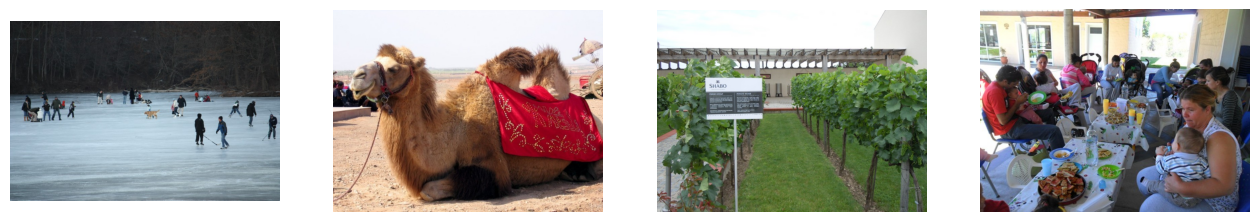

In [222]:
print('4 sample imag fron random classes')
fig=plt.figure(figsize=(16,16))
for i in range(1,5):
  ri=random.choices(os.listdir(base_path), k=3)
  folder=base_path+'/'+ri[0]+'/'+ri[1]+'/'+ri[2]
  random_img=random.choice(os.listdir(folder))
  img=np.array(Image.open(folder+'/'+random_img))
  fig.add_subplot(1,4,i)
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [223]:
from keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [224]:
learning_rate=0.0001
decay_speed=1e-6
momentum =0.9
loss_fuction='sparse_categorical_crossentropy'
source_model=VGG19(weights=None)
drop_layer=Dropout(0.5)


In [225]:
from tensorflow import keras

# Create a simple model for demonstration
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               19267712  
                                                                 
 dense_11 (Dense)            (None, 20)                2580      
                                                                 
Total params: 19,270,292
Trainable params: 19,270,292
Non-trainable params: 0
_________________________________________________________________


In [226]:
from keras.optimizers import RMSprop  # Import the RMSprop optimizer class

# Define the learning rate
learning_rate = 0.001  # Adjust the learning rate as needed

# Create the RMSprop optimizer with the specified learning rate
optimizer = RMSprop(learning_rate=learning_rate)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss=loss_fuction, metrics=["accuracy"])


In [227]:
def image_reshape(im,tarrget_size):
  return cv2.resize(im,tarrget_size)

In [228]:
batch_size = 16
epoch_shuffle =True
weight_classes =True
epochs=1


In [238]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = min(start + batch_size, len(dataframe))  # Ensure we don't go beyond the end of the dataframe

    for idx in range(start, end_img):
        row = dataframe.iloc[idx]
        fname = row['id']  # Replace 'id' with the actual column name for the image filenames
        label = row['landmark_id']  # Replace 'landmark_id' with the actual column name for labels

        # Assuming your images are stored in a directory and you load them here
        # Modify this part based on your actual image loading code
        try:
            full_path = os.path.join(base_path, fname)
            im = cv2.imread(full_path)

            if im is not None:
                # Preprocess your image here (resize, normalize, etc.)
                im = cv2.resize(im, (224, 224))  # Example: Resize to 224x224 pixels
                im = im / 255.0  # Example: Normalize pixel values to [0, 1]

                image_array.append(im)
                label_array.append(label)
        except Exception as e:
            print(f"Error loading image {fname}: {str(e)}")

    if len(label_array) > 0:
        # You might need to encode your labels here if they are not already one-hot encoded
        label_array = encode_labels(label_array)  # Implement 'encode_labels' function as needed

    return np.array(image_array), np.array(label_array)


In [239]:
train,val=np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

2076
520


In [240]:
batch_size = 16
epoch_shuffle =True
weight_classes =True
epochs=1


In [241]:
for e in range(epochs):
  print("Epoch"+str(e+1)+"/"+str(epochs))
  if epoch_shuffle:
    train =train.sample(frac=1)
  for it in range(int(np.ceil(len(train)/batch_size))):
    X_train,y_train=get_batch(train,it*batch_size,batch_size)

Epoch1/1


In [272]:
batch_size = 16

errors = 0
good_preds = []
bad_preds = []

# Assuming you have a validation dataset 'val' defined
for it in range(int(np.ceil(len(val) / batch_size))):
    X_val, y_val = get_batch(val, it * batch_size, batch_size)

    # Check if the batch is empty
    if X_val.shape[0] == 0:
        continue  # Skip this batch if it's empty

    print("X_val shape:", X_val.shape)
    print("y_val shape:", y_val.shape)

    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)

    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size * it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size * it + idx, cla[idx], res[cla[idx]]])


for i in range(min(5, len(good_preds))):
    n = int(good_preds[i][0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
